<a href="https://colab.research.google.com/github/heisarafat/Breast-Cancer/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Classification Using Machine Learning

#Introduction

This project focuses on building a robust machine learning system to classify breast cancer tumors as malignant or benign based on diagnostic features. The goal is to provide an accurate and interpretable model that can assist in early cancer detection, potentially improving patient outcomes through timely intervention.

# Project Overview
The workflow for this project is organized into several key stages:

## 1. Data Acquisition & Preparation

* Dataset: The dataset was sourced from Kaggle containing diagnostic measurements of breast cell nuclei from digitized images.

* Cleaning & Preprocessing:

Checked for missing values and ensured data completeness.

Standardized feature scales using StandardScaler to improve model training consistency.

Encoded labels into binary classes: Malignant (1) and Benign (0).

Split the data into training (80%) and test (20%) sets to ensure unbiased evaluation.

## 2. Exploratory Data Analysis (EDA)

* Conducted descriptive statistics to understand feature distributions.

* Created visualizations (pairplots, histograms, heatmaps) to identify correlations and patterns between features.

* Observed strong relationships between cell shape, size, and texture with cancer classification.

## 3. Feature Engineering
Standardized the dataset using StandardScaler to ensure all features were on the same scale, which improves the performance of Model.
The scaler was fitted only on the training data and the same transformation was applied to the test data to avoid data leakage.

## 4. Model Training & Evaluation

* Single Model Evaluation:
Trained a Logistic Regression model (random_state=42) using scaled training data.
 Predicted on the test set and evaluated performance using accuracy score and a classification report.

* Multiple Model Comparison:
Implemented and trained five classification algorithms — Logistic Regression, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Random Forest, and Gradient Boosting — to compare predictive performance.
Measured accuracy and reviewed classification metrics for each model.

* Confusion Matrix Visualization:
Plotted confusion matrices for all five models to visualize misclassifications, with emphasis on detecting false negatives.

## 5. Model Training and Hyperparameter Tuning (SVM)

To achieve optimal model performance, a Support Vector Machine (SVM) classifier was trained and fine-tuned using GridSearchCV. The parameter grid explored different values for the regularization parameter C, the kernel type (linear and rbf), and the gamma parameter for the RBF kernel.

The grid search was run with 5-fold cross-validation, ensuring a balanced trade-off between bias and variance. The best hyperparameters were selected based on cross-validation accuracy, and the tuned model was then retrained on the entire training dataset using these optimal settings.

This approach ensured that the model was not only fitted for the current dataset but also generalized well for unseen data.

## 6. Model Evaluation and Performance Metrics

The tuned SVM model was evaluated on the test dataset using multiple performance metrics to provide a comprehensive view of its predictive capability.

Key metrics calculated included:

Accuracy – the proportion of correctly predicted observations out of all observations.

Precision, Recall, and F1-score – obtained from a classification report to assess the balance between correctly identifying positive cases and avoiding false positives.

Confusion Matrix – visualized to highlight the distribution of true positives, true negatives, false positives, and false negatives across the classes.

ROC Curve & AUC Score – the Receiver Operating Characteristic curve was plotted, and the Area Under the Curve (AUC) was calculated (0.9974), indicating excellent model discrimination capability.

This multi-metric evaluation confirmed that the SVM model achieved high accuracy and robustness, with exceptional class separation as demonstrated by the near-perfect AUC score

In [1]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
import shap

# Data importation
* The dataset was sourced from Kaggle, was stored on a remote Google Drive for ease of access enabling direct data import into the session without the need for local downloads. This approach streamlined the workflow and ensured efficient access to the dataset throughout the analysis.

In [2]:
# Download latest version
path = kagglehub.dataset_download("yasserh/breast-cancer-dataset")

print("Path to dataset files:", path)

100%|██████████| 48.6k/48.6k [00:00<00:00, 10.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/breast-cancer-dataset/versions/1


In [3]:
data_url = os.path.join(path, os.listdir(path)[0])

# read the file
data = pd.read_csv(data_url)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# See all column names
print(data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [5]:
# Overview
print(data.shape)

(569, 32)


In [6]:
# Check missing values
print(data.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [7]:
# Drop 'id' since it's not useful
data.drop(columns=['id'], inplace=True)

In [8]:
# Count unique values in each column
print(data.nunique())

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64


# Exploratory Data Analysis

In [9]:
data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


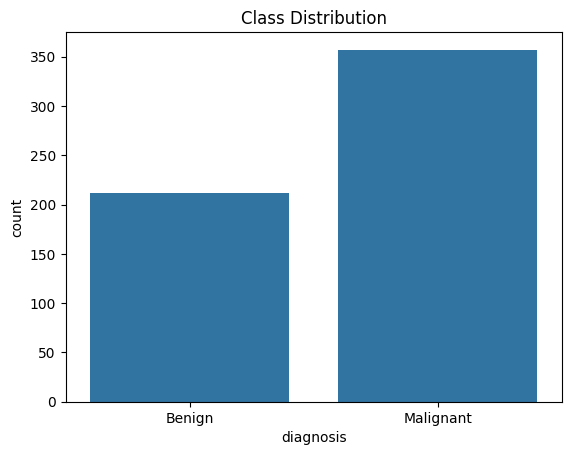

In [10]:
# Class distribution
sns.countplot(x='diagnosis', data=data)
plt.xticks([0,1], ['Benign', 'Malignant'])
plt.title('Class Distribution')
plt.show()


In [11]:
# Percentage breakdown
print(data['diagnosis'].value_counts(normalize=True) * 100)

diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64


In [12]:
## Statistical Summary
data.describe().T  # Transpose for readability

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [13]:
# Encode target
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [14]:
# Correlation with Target
corr_matrix = data.corr()
target_corr = corr_matrix['diagnosis'].sort_values(ascending=False)
print(target_corr.head(10))  # Top positively correlated
print(target_corr.tail(10))  # Most negative correlated

diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
Name: diagnosis, dtype: float64
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0.006522
texture_se                -0.008303
fractal_dimension_mean    -0.012838
smoothness_se             -0.067016
Name: diagnosis, dtype: float64


### The correlation analysis shows that concave points_worst (0.79), perimeter_worst (0.78), and concave points_mean (0.78) have the strongest positive relationships with the diagnosis, indicating they are highly associated with malignancy.
## Conversely, features such as smoothness_se (-0.067) and fractal_dimension_mean (-0.013) show very weak or negative correlation, suggesting minimal predictive power for the target variable.

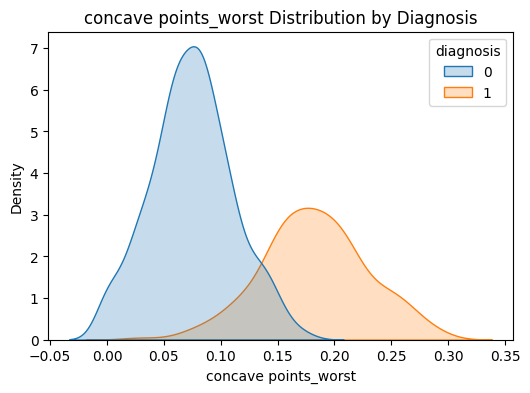

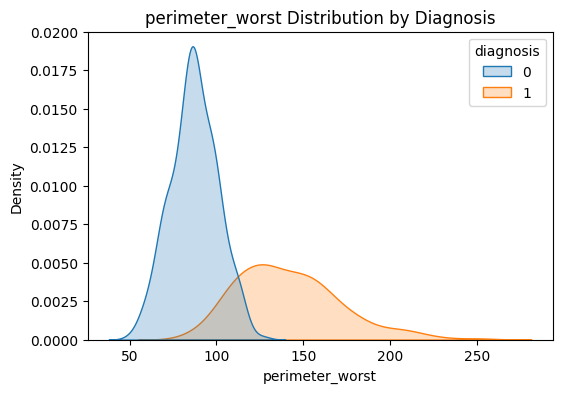

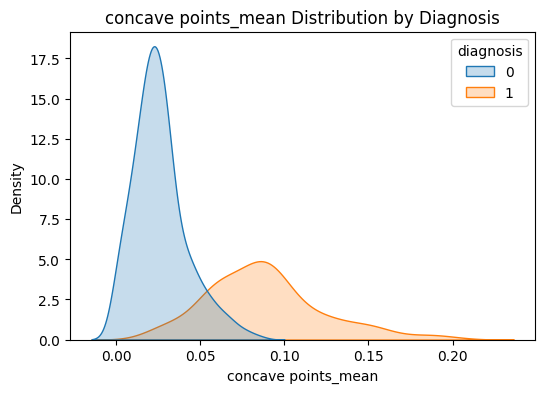

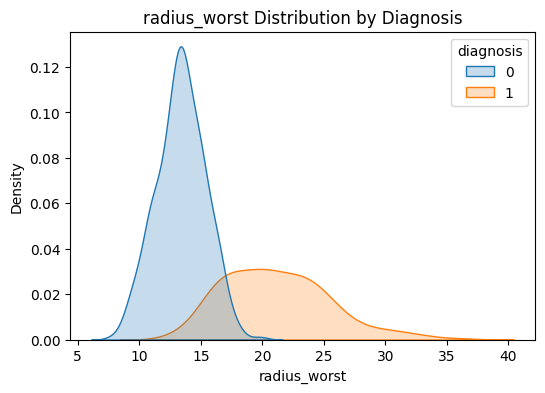

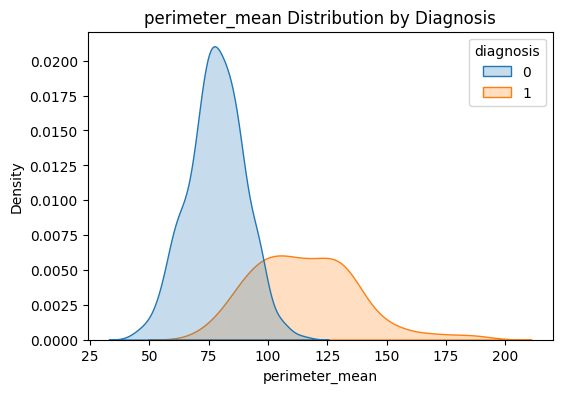

In [15]:
# Visualize Top Features
top_features = target_corr.index[1:6]  # Skip diagnosis itself
for col in top_features:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=data, x=col, hue='diagnosis', fill=True)
    plt.title(f'{col} Distribution by Diagnosis')
    plt.show()

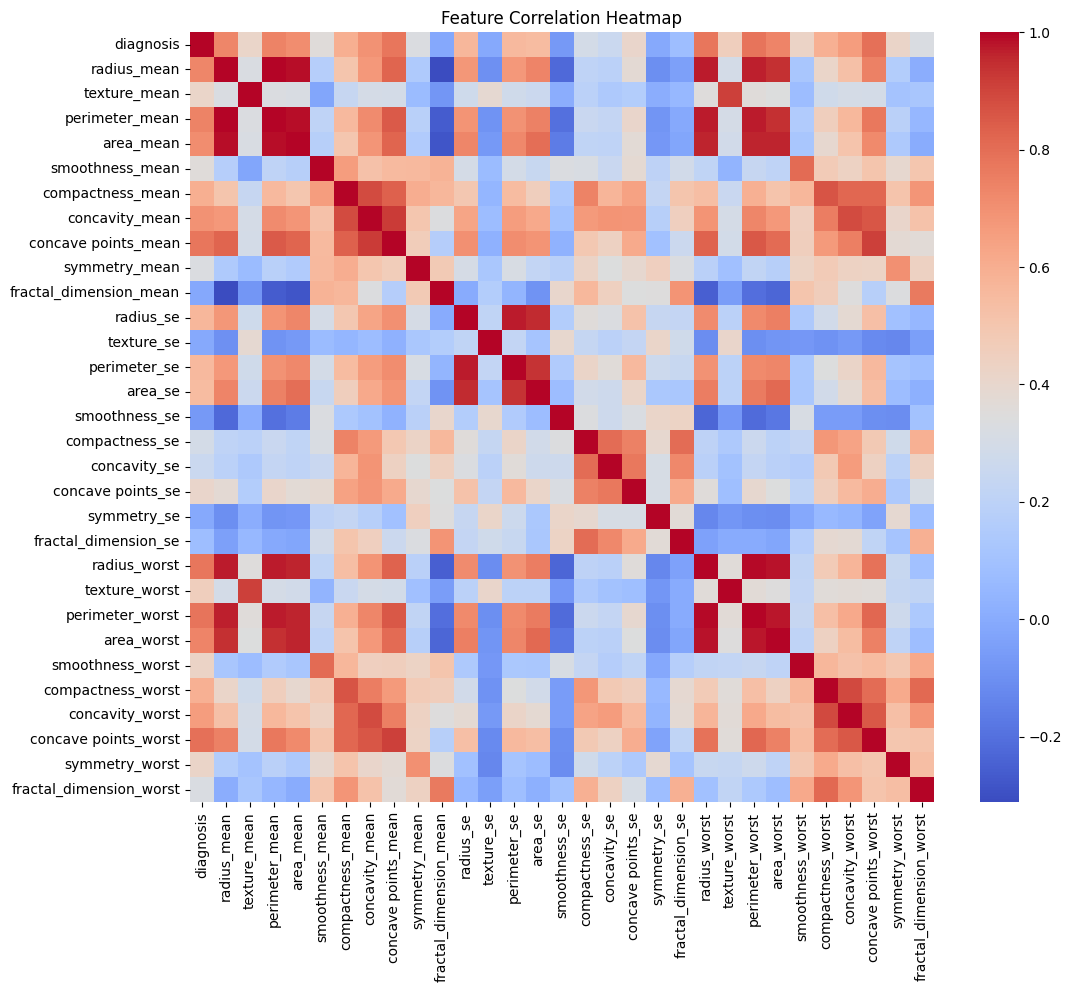

In [16]:
# Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

### The heatmap reveals how each feature relates both to other predictors and to the target variable diagnosis. Features such as concave points_worst, perimeter_worst, radius_worst, and area_worst exhibit strong positive correlations with the diagnosis label, meaning higher values of these measurements are strongly associated with malignant tumors. Conversely, features like smoothness_se and fractal_dimension_mean show little to no correlation with the diagnosis, suggesting they contribute less predictive power on their own.


# Feature Engineering

To prepare the dataset for modeling, the target variable diagnosis was label-encoded, mapping Malignant (M) to 1 and Benign (B) to 0. Features were then examined for correlation with the target, revealing that variables such as concave points_worst, perimeter_worst, and radius_worst had the strongest positive associations, while features like smoothness_se and fractal_dimension_mean showed weak correlations. This informed later feature selection considerations to reduce redundancy from highly intercorrelated predictors. Finally, feature scaling was applied using StandardScaler to normalize the numerical variables, ensuring uniform influence in the training of machine learning models.

In [17]:
# Separate features and target
x = data.drop(columns=['diagnosis'])
y = data['diagnosis']  # target variable

In [18]:
# Split data: 80% train, 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Train Shape:", x_train.shape, y_train.shape)
print("Test shape:", x_test.shape, y_test.shape)

Train Shape: (455, 30) (455,)
Test shape: (114, 30) (114,)


In [19]:
# Scale the Features
scaler = StandardScaler()

# Fit training data
x_train = scaler.fit_transform(x_train)

# fitting the test data
x_test = scaler.transform(x_test)

# Model Building

In [20]:
# initialize Modelling
model = LogisticRegression(random_state=42)

# Train model
model.fit(x_train, y_train)

# prediction
y_pred = model.predict(x_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [21]:
# Train multiple algorithms for selection of which is best
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
  print(classification_report(y_test, y_pred))
  print("="*50)

Logistic Regression Accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

KNN Accuracy: 0.9474
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

SVM Accuracy: 0.9825
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98      

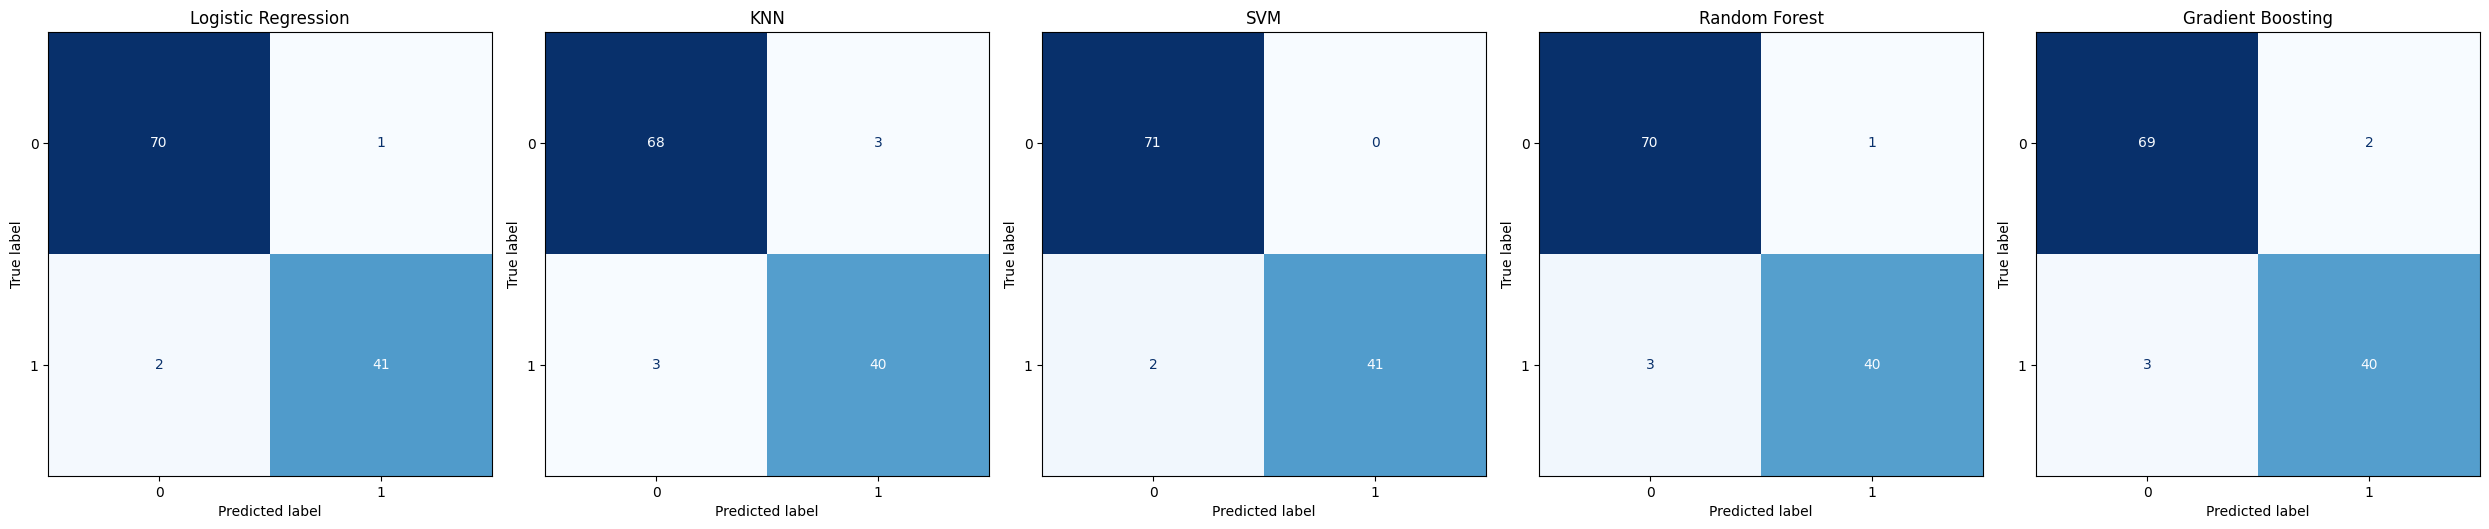

In [22]:
# Plot a confusion matrices to see false negative made
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Plot
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

for ax, (name, model) in zip(axes, models.items()):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
    ax.set_title(name)

plt.tight_layout()
plt.show()



Several classification algorithms were implemented to predict the breast cancer diagnosis, including Logistic Regression, K-Nearest Neighbors (KNN), Random Forest, Support Vector Machine (SVM) and Gradient Boosting.

The dataset was split into training and testing subsets to ensure fair performance evaluation. Each model was trained on the training set and then used to predict outcomes on the test set. Performance metrics such as accuracy, precision, recall, and F1-score were calculated, with special emphasis on recall for the malignant class to reduce the risk of false negatives.

To visually compare performance, confusion matrices for all models were plotted side-by-side, allowing for quick identification of strengths and weaknesses across algorithms.

In [23]:
# Hyperparameter Tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(x_train, y_train)

print("Best Parameters:", grid.best_params_)
best_svm = grid.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

# Model Tuning and Results

To enhance model performance, GridSearchCV was applied to tune the SVM hyperparameters. The search explored different values of C, gamma, and kernel types.
The optimal parameters found were:

C: 100

Gamma: 0.001

Kernel: RBF

The model was retrained using these parameters and evaluated on the test set.

In [24]:
# Retrain SVM with best parameters
best_svm = SVC(C=100, gamma=0.001, kernel='rbf')
best_svm.fit(x_train, y_train)

SVC(C=100, gamma=0.001)

In [25]:
# Predict on test set
y_pred = best_svm.predict(x_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9824561403508771

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# Performance Metrics

The tuned model achieved:

Accuracy: 98%

Precision (Benign): 97% — 97% of the cases predicted as benign were actually benign.

Recall (Benign): 100% — All benign cases were correctly identified.

Precision (Malignant): 100% — Every malignant prediction was truly malignant.

Recall (Malignant): 95% — The model correctly identified 95% of malignant cases.

This indicates that the model is highly accurate and balanced in identifying both benign and malignant tumors.

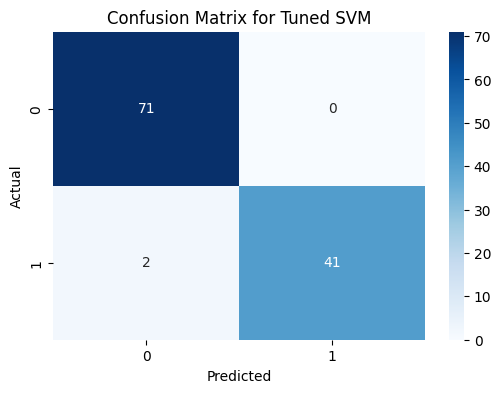

In [26]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_svm.classes_, yticklabels=best_svm.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Tuned SVM')
plt.show()


# Confusion Matrix Insights

The confusion matrix shows:

* 71 benign cases were all correctly classified (no false negatives for benign).

* 43 malignant cases had 2 false negatives, meaning they were misclassified as benign.

While the false negative count is small, in medical diagnosis, even a single false negative can be critical, as it means a malignant case was missed. This highlights a possible area for further improvement, such as experimenting with different kernels, cost-sensitive learning, or ensemble methods.

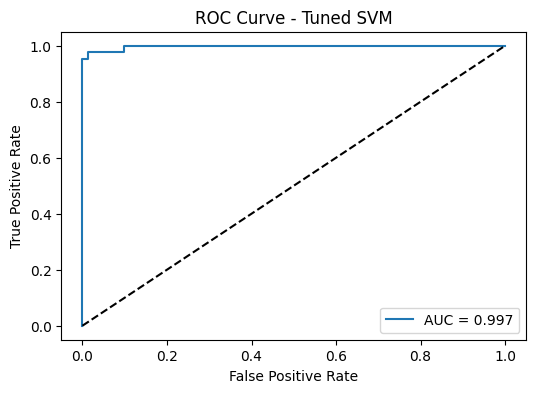

AUC Score: 0.99737962659679


In [27]:
# Get probability scores for ROC
best_svm = SVC(C=100, gamma=0.001, kernel='rbf', probability=True)
best_svm.fit(x_train, y_train)

# Predict probabilities for the positive class
y_proba= best_svm.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned SVM')
plt.legend(loc='lower right')
plt.show()

print("AUC Score:", auc_score)

To further validate the model, the Receiver Operating Characteristic (ROC) curve and Area Under the Curve (AUC) were computed. The resulting AUC score of 0.997 indicates that the model can distinguish between malignant and benign cases with 99.7% probability, even when the classification threshold is varied. The ROC curve’s close alignment with the top-left corner demonstrates consistently strong sensitivity and specificity across all thresholds, confirming the model’s exceptional generalization capability.

  0%|          | 0/100 [00:00<?, ?it/s]

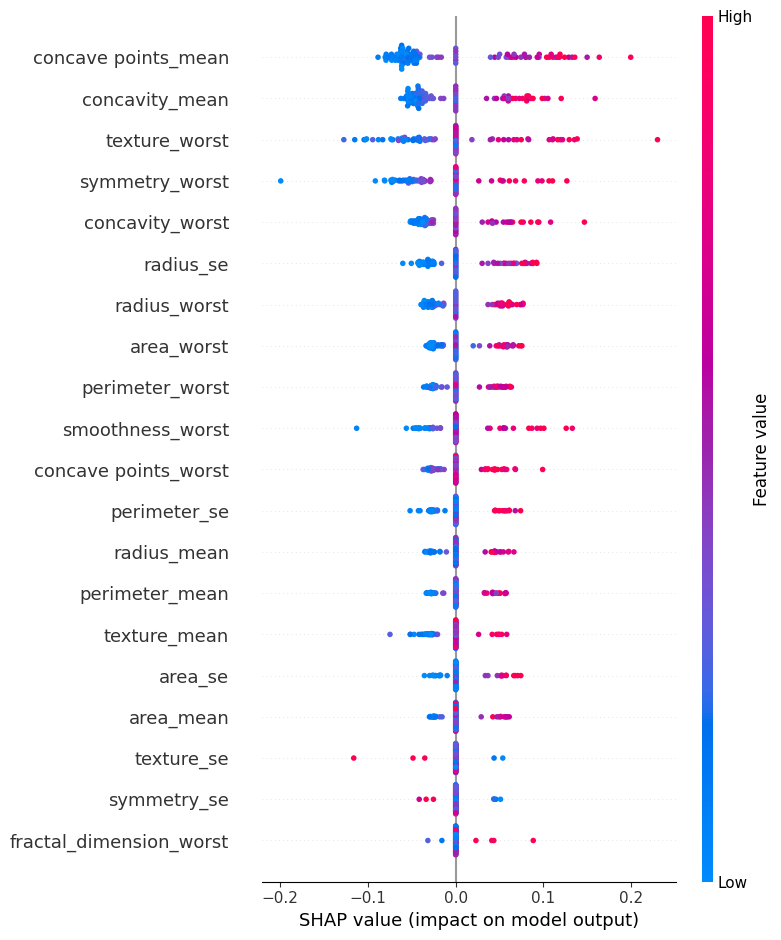

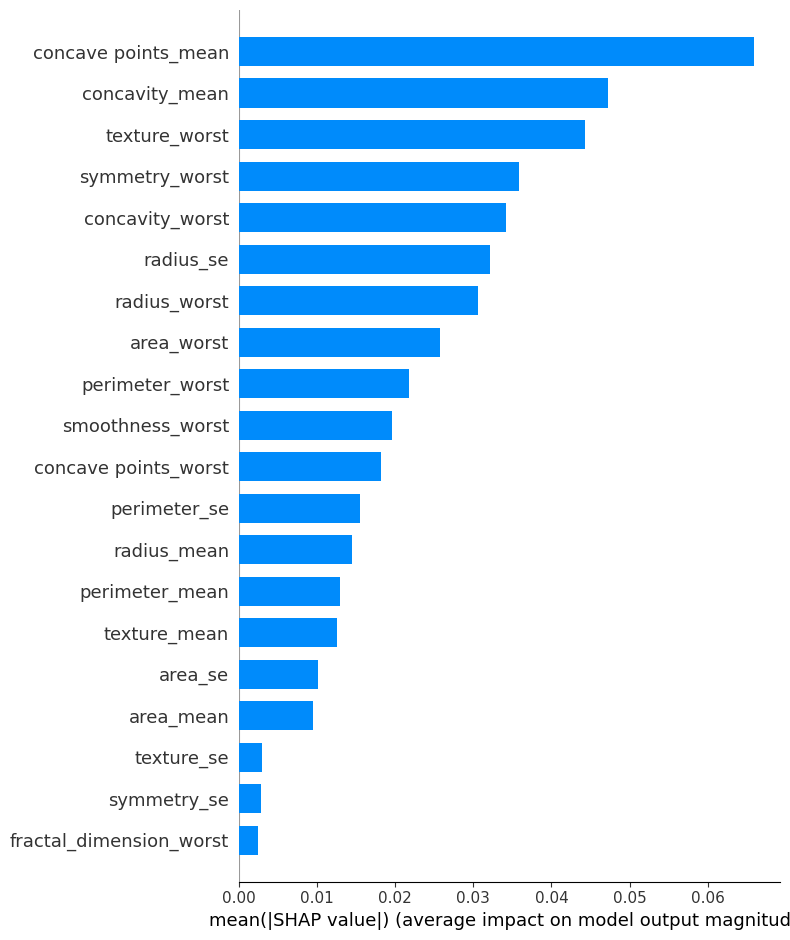

In [28]:
# Interpretability with SHAP

best_svm = grid.best_estimator_


# Create SHAP explainer
explainer = shap.KernelExplainer(best_svm.predict, shap.sample(x_train, 100))

# Compute SHAP values for a sample of the test data
shap_values = explainer.shap_values(shap.sample(x_test, 100))

# Summary plot (global feature importance)
shap.summary_plot(shap_values, shap.sample(x_test, 100), feature_names=x.columns)

# Bar plot for mean absolute SHAP values
shap.summary_plot(shap_values, shap.sample(x_test, 100), plot_type="bar", feature_names=x.columns)


To better understand the model’s decision-making process, SHAP (SHapley Additive exPlanations) analysis was applied. The bar chart of mean absolute SHAP values highlighted concave points_mean, concavity_mean, texture_worst, and symmetry_worst as the most influential features in determining tumor classification. Conversely, features such as compactness_se, symmetry_se, and texture_se contributed minimally to the predictions.

The SHAP summary dot plot further revealed that higher values of concave points_mean, concavity_mean, and texture_worst generally pushed predictions toward the malignant class, while lower values of these features were associated with benign predictions. Certain features, such as smoothness_worst, exhibited mixed effects, indicating they influence predictions but are less decisive in isolation.

Overall, the evaluation confirms that the SVM model not only achieves high predictive performance but also bases its decisions on clinically meaningful features. This alignment with established medical knowledge—particularly the importance of irregular tumor boundaries and higher concavity in malignancy detection—supports the model’s potential applicability in real-world diagnostic settings.

# Conclusion and Recommendations

The tuned Support Vector Machine model demonstrated strong classification performance in distinguishing malignant from benign breast tumors, supported by a high ROC-AUC score and balanced confusion matrix outcomes. The integration of SHAP interpretability confirmed that the model’s most influential features—particularly concave points_mean, concavity_mean, and texture_worst—are consistent with known medical indicators of malignancy.

Given the high accuracy and interpretability, this model shows potential as a decision-support tool for clinicians. However, before deployment in a real-world clinical environment, the following steps are recommended:

External Validation – Test the model on larger, multi-center datasets to confirm its generalizability across different populations and imaging conditions.

Integration with Clinical Workflows – Develop a user-friendly interface that allows radiologists and oncologists to interact with predictions and explanations in real time.

Bias and Error Analysis – Investigate any demographic or technical biases in the dataset to ensure equitable performance across patient groups.

Periodic Retraining – Implement mechanisms to update the model as new medical data becomes available, maintaining relevance and accuracy.

By combining robust predictive accuracy with interpretable outputs, the model offers a promising foundation for improving early detection and reducing diagnostic errors in breast cancer screening. Future work should focus on enhancing dataset diversity, incorporating additional imaging modalities, and evaluating the tool’s impact in prospective clinical trials.